importing libraries 


In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('omw-1.4')
import numpy as np


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/al/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/al/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /home/al/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /home/al/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/al/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading the dataset

In [2]:
df = pd.read_csv('reviews.csv')

### Q1. How many words were typically contained in the reviews?

In [3]:
df['totalwords'] = df['text'].str.split().str.len()

Total = df['totalwords'].sum()
AVG = df['totalwords'].mean()
print('Total words in reviews', Total)
print('AVG of words in each review ', AVG)

Total words in reviews 25113
AVG of words in each review  125.565


### Q2. What are the most frequently used terms in the reviews?

In [4]:
df.head()

,Customer Review,text,totalwords
0,Review 1,I travel alot and really enjoyed my stay here....,39
1,Review 2,Stayed one night for a seminar at the Universi...,76
2,Review 3,I stayed at the the BW Downtown on two separat...,241
3,Review 4,This is my first year to go to with a group of...,97
4,Review 5,I travel with several friends (we're from a sm...,77


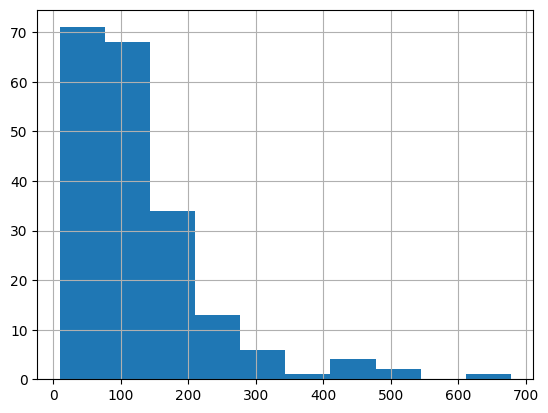

In [5]:
import matplotlib.pyplot as plt
df.totalwords.hist()
plt.show()

### Counting top 10 most Frequent terms

In [6]:
df.text.str.split(expand=True).stack().value_counts().head(10)


the    1234
and     913
a       666
to      597
was     427
in      347
I       341
is      329
of      322
The     319
dtype: int64

#### All of them are not bringing any value so 
Next we are removing the stop words.
<br>Such as ( “the”, “a”, “an”, “in”) 

In [7]:
#lower casing every single words 
df['text'] = df['text'].astype(str).str.lower()

#tokenizing each word
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['text_token']=df['text'].apply(regexp.tokenize)

#removing the stop words 
stopwords = nltk.corpus.stopwords.words("english")
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

stopwords = nltk.corpus.stopwords.words("german")
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

stopwords = nltk.corpus.stopwords.words("italian")
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

stopwords = nltk.corpus.stopwords.words("spanish")
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

# putting back into a single sentence
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['text', 'text_string']].head()

,text,text_string
0,i travel alot and really enjoyed my stay here....,travel alot really enjoyed stay hotel clean st...
1,stayed one night for a seminar at the universi...,stayed one night seminar university clean comf...
2,i stayed at the the bw downtown on two separat...,stayed downtown two separate business trips no...
3,this is my first year to go to with a group of...,first year group quilter southeast kansas inte...
4,i travel with several friends (we're from a sm...,travel several friends small town girl weekend...


### 10 most appeared term after removing stop words 

In [8]:
df.text_string.str.split(expand=True).stack().value_counts().head(10)

hotel        332
room         171
staff        153
great        124
stay         117
rooms         97
clean         93
nice          92
breakfast     88
good          85
dtype: int64

In [9]:
all_words = ' '.join([word for word in df['text_string']])
tokenized_words = nltk.word_tokenize(all_words)

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words )
fdist


FreqDist({'hotel': 332, 'room': 171, 'staff': 153, 'great': 124, 'stay': 117, 'rooms': 97, 'clean': 93, 'nice': 92, 'breakfast': 88, 'good': 85, ...})

##### Q2. answer "hotel"

### Q3. Calculate the term-frequency matrix. 
<br>Why can we not use term frequency alone to rank or weight
the terms?




 ### Term Frequency Matrix for top 10 | Decending by Hotel term

In [10]:
words_set = set()
text = list(df["text_string"])

for doc in  text:
    words = doc.split(' ')
    words_set = words_set.union(set(words))
    
print('Number of words in the corpus:',len(words_set))
n_docs = len(text)         #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the 

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_set)

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = text[i].split(' ') # Words in the document
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))

df_tf[['hotel','room','staff','great','stay','rooms','clean','nice', 'breakfast','good']].head().sort_values('hotel', ascending=False ).style.hide_index()

Number of words in the corpus: 3236


hotel,room,staff,great,stay,rooms,clean,nice,breakfast,good
0.058824,0.000000,0.058824,0.000000,0.117647,0.000000,0.058824,0.000000,0.000000,0.000000
0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.020408,0.040816,0.020408,0.000000,0.020408,0.000000,0.040816,0.040816,0.000000,0.000000
0.000000,0.000000,0.008333,0.008333,0.016667,0.008333,0.000000,0.000000,0.008333,0.008333
0.000000,0.000000,0.027027,0.027027,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000


#### Document Frequency Matrix| Decending by hotel term

In [11]:
cv = CountVectorizer()
word_count_vector = cv.fit_transform(df["text_string"])
tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
tf[['hotel','room','staff','great','stay','rooms','clean','nice', 'breakfast','good']].sort_values('hotel', ascending=False )


,hotel,room,staff,great,stay,rooms,clean,nice,breakfast,good
48,12,3,2,1,0,0,0,0,1,1
123,12,8,4,0,2,1,2,0,0,0
186,8,4,1,3,2,0,0,2,0,3
18,7,1,1,0,3,2,1,1,2,1
117,6,2,0,2,4,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...
85,0,3,1,2,1,2,1,1,0,1
32,0,1,0,0,0,0,0,0,0,0
168,0,0,0,2,0,2,0,2,1,1
29,0,0,2,3,1,2,0,1,0,0


####  Q3 answer. A word with the frequency of 3 with the length of sentence being 10 is not the same as when the word length of sentence being 100 words.<br> 

##### Q4. Build the TF-IDF matrix. What can you observe? <br>What are the terms with the highest collective weighting (importance), using both term frequency and inverse term frequency?<br> Were thes different from the most frequent terms? Why?

#### TF-IDF Matrix of top 10 terms | Decending from Hotel 

In [12]:
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(text)
tf_idf_array = tf_idf_vector.toarray()
words_set = tr_idf_model.get_feature_names()
tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)
tf_idf[['hotel','room','staff','great','stay','rooms','clean','nice', 'breakfast','good']].head().sort_values('hotel', ascending=False )

,hotel,room,staff,great,stay,rooms,clean,nice,breakfast,good
0,0.089893,0.000000,0.110105,0.000000,0.263123,0.000000,0.135873,0.000000,0.000000,0.000000
1,0.046157,0.124722,0.056535,0.000000,0.067552,0.000000,0.139532,0.160594,0.000000,0.000000
3,0.045759,0.000000,0.056048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.032071,0.039319,0.076642,0.039065,0.000000,0.000000,0.041476,0.044536
4,0.000000,0.000000,0.064499,0.079076,0.077068,0.000000,0.000000,0.000000,0.000000,0.000000


#### Computing IDF / Inverse Term Frequency <br> Most Frequent terms  weights

In [13]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf':tfidf_transformer.idf_})
idf.sort_values(by=['idf'])
idf.loc[idf['feature_name'].isin(['hotel','room','staff','great','stay','rooms','clean','nice', 'breakfast','good'])].sort_values(by=["idf"],ascending=False)


,feature_name,idf
1923,nice,2.225767
1282,good,2.176171
398,breakfast,2.026639
569,clean,1.933857
1301,great,1.921278
2422,rooms,1.908856
2707,stay,1.872488
2421,room,1.728594
2681,staff,1.567106
1437,hotel,1.279424


#### top 5 weighted idf terms| highest & lowest 

In [14]:
idf.sort_values(by=['idf'],ascending=False)

,feature_name,idf
1618,laptop,5.610158
1832,minorile,5.610158
1868,move,5.610158
1869,moved,5.610158
1871,moving,5.610158
...,...,...
2422,rooms,1.908856
2707,stay,1.872488
2421,room,1.728594
2681,staff,1.567106


#### tf-idf weight of most frequent Terms 

In [15]:
tf_idf_vector=tfidf_transformer.transform(word_count_vector)
feature_names = cv.get_feature_names()
first_document_vector=tf_idf_vector[1]
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df_tfifd['feature_name'] = df_tfifd.index
#df_tfifd.sort_values(by=["tfidf"],ascending=False)

#df_tfifd.loc[(df_tfifd['feature_name'] == 'hotel' ) and (df_tfifd['feature_name'] == 'room')]
df_tfifd.loc[df_tfifd['feature_name'].isin(['hotel','room','staff','great','stay','rooms','clean','nice', 'breakfast','good'])].sort_values(by=["tfidf"],ascending=False)


,tfidf,feature_name
nice,0.160594,nice
clean,0.139532,clean
room,0.124722,room
stay,0.067552,stay
staff,0.056535,staff
hotel,0.046157,hotel
breakfast,0.000000,breakfast
good,0.000000,good
great,0.000000,great
rooms,0.000000,rooms


##### TOP 10 of tf-idf weighted terms

In [16]:
dff=df_tfifd.sort_values(by=["tfidf"],ascending=False)
dff.head(10)

,tfidf,feature_name
restaurant,0.216995,restaurant
eric,0.202392,eric
unit,0.202392,unit
seminar,0.202392,seminar
inconveniences,0.202392,inconveniences
temp,0.187765,temp
despite,0.187765,despite
shut,0.187765,shut
handling,0.187765,handling
thermostat,0.187765,thermostat


In [17]:
words_set = set()
text = list(df["text_string"])

for doc in  df.text_string:
    words = doc.split(' ')
    words_set = words_set.union(set(words))
    
#print('Number of words in the corpus:',len(words_set))
n_docs = len(text)         #·Number of documents in the corpus

#print('Number of documents in the corpus:',n_docs)
n_words_set = len(words_set) #·Number of unique words in the 

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_set)

#Compute Term Frequency (TF)
#for i in range(n_docs):
#    words = text[i].split(' ') # Words in the document
#    for w in words:
#        df_tf[w][i] = df_tf[w][i] + (1 / len(words))
        
        
#df_tf[['hotel','room','staff','great','stay','rooms','clean','nice', 'breakfast','good']].sort_values('hotel', ascending=False ).style.hide_index()

##### idf & tf-idf weight list for most frequent terms | Decending according idf

In [18]:
#display(pd.concat([idf, df_tfifd], axis=1, join='inner'))
merged_inner = pd.merge(left=idf, right=df_tfifd, left_on='feature_name', right_on='feature_name')
merged_inner.sort_values(by=["tfidf"],ascending=False)
merged_inner.loc[merged_inner['feature_name'].isin(['hotel','room','staff','great','stay','rooms','clean','nice', 'breakfast','good'])].sort_values(by=["idf"],ascending=False)


,feature_name,idf,tfidf
1923,nice,2.225767,0.160594
1282,good,2.176171,0.000000
398,breakfast,2.026639,0.000000
569,clean,1.933857,0.139532
1301,great,1.921278,0.000000
2422,rooms,1.908856,0.000000
2707,stay,1.872488,0.067552
2421,room,1.728594,0.124722
2681,staff,1.567106,0.056535
1437,hotel,1.279424,0.046157


#### Top 5 terms for TF , IDF & Tf-idf

In [29]:
data = [['hotel', 'laptop','restaurant'], ['room', 'minorile','eric'], ['staff', 'move','unit'],['great', 'moved','seminar'],['stay', 'moving','inconveniences']]
df_tp = pd.DataFrame(data, columns=['TF','IDF','TF-IDF'])
df_tp

,TF,IDF,TF-IDF
0,hotel,laptop,restaurant
1,room,minorile,eric
2,staff,move,unit
3,great,moved,seminar
4,stay,moving,inconveniences


In [19]:
#https://hackernoon.com/document-term-matrix-in-nlp-count-and-tf-idf-scores-explained
#https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558
#https://www.learndatasci.com/glossary/tf-idf-term-frequency-inverse-document-frequency/

#### Q.5 What is the final decision the professor needs to make after the analysis?

ans. Choose the hotel to stay

#### Q6. If you are asked to label the reviews to GOOD or BAD, what will you do? Write your conceptual model, then implement an algorithm that will help you in this task, finally how many good reviews and how many bad reviews?

Ans. Lemmatize, Analyze sentiment intensity and get polarity score,. Filter out postive & negetive sentense with compund score. <br> we get positive:193 & negative: 7

In [20]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 2 ]))
wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)


df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])
df.is_equal.value_counts()

analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)



,Customer Review,text,totalwords,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
197,Review 198,dieses ist immer wieder eines meiner favourite...,73,"[immer, favouriten, houston, basierend, preis,...",immer favouriten houston basierend preis leist...,immer houston top zimmer hilton garden inn sta...,immer houston top zimmer hilton garden inn sta...,True,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."
198,Review 199,sch√∂ne zimmer und sind sehr gut eingerichtet....,70,"[sch, zimmer, gut, eingerichtet, service, ausg...",sch zimmer gut eingerichtet service ausgezeich...,zimmer gut service ausgezeichnet hotel bietet ...,zimmer gut service ausgezeichnet hotel bietet ...,True,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou..."
199,Review 200,"quite a bit from the downtown, but if you you'...",63,"[quite, bit, downtown, area, probably, better,...",quite bit downtown area probably better place ...,quite bit downtown area probably better place ...,quite bit downtown area probably better place ...,True,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."


In [21]:
df = pd.concat(
    [df.drop(['polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,Customer Review,text,totalwords,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,Review 1,i travel alot and really enjoyed my stay here....,39,"[travel, alot, really, enjoyed, stay, hotel, c...",travel alot really enjoyed stay hotel clean st...,travel alot really enjoyed stay hotel clean st...,travel alot really enjoyed stay hotel clean st...,True,0.000,0.579,0.421,0.8805
1,Review 2,stayed one night for a seminar at the universi...,76,"[stayed, one, night, seminar, university, clea...",stayed one night seminar university clean comf...,stayed one night university clean comfortable ...,stayed one night university clean comfortable ...,True,0.031,0.592,0.377,0.9638
2,Review 3,i stayed at the the bw downtown on two separat...,241,"[stayed, bw, downtown, two, separate, business...",stayed downtown two separate business trips no...,stayed downtown two separate business trips 20...,stayed downtown two separate business trips 20...,True,0.000,0.674,0.326,0.9906


In [67]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'negative')
df.head(4)
df.loc[df['compound'].idxmax()].values
df.loc[df['compound'].idxmin()].values
df.sentiment.value_counts()

positive    193
negative      7
Name: sentiment, dtype: int64

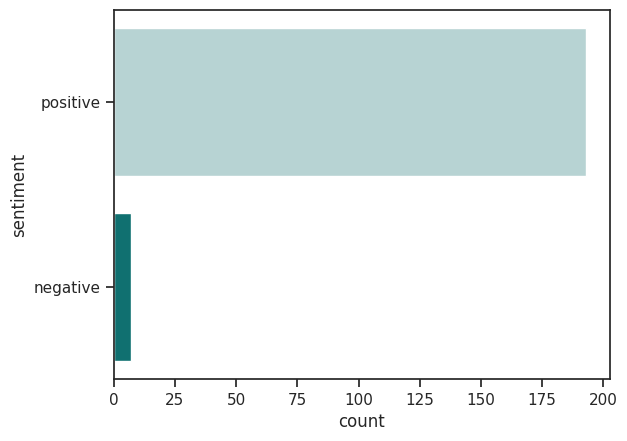

In [39]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

In [68]:
df.sentiment.value_counts()

positive    193
negative      7
Name: sentiment, dtype: int64